In [11]:
!pip install scipy
!pip install seaborn

import pandas as pd
!pip install matplotlib==3.8.1
import matplotlib.pyplot as plt

import numpy as np
import scipy
import scipy.stats as stats
import seaborn as sns


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
paleta_de_colores = ["#fbf8cc","#fde4cf","#ffcfd2","#f1c0e8","#cfbaf0","#a3c4f3","#90dbf4","#8eecf5","#98f5e1","#b9fbc0"]

# 1. Análisis de facturación



### Importación de datos

In [13]:
tienda1 = pd.read_csv("base_de_datos/tienda_1.csv")
tienda2 = pd.read_csv("base_de_datos/tienda_2.csv")
tienda3 = pd.read_csv("base_de_datos/tienda_3.csv")
tienda4 = pd.read_csv("base_de_datos/tienda_4.csv")

tienda1.head()

Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito                   8   4.60971 -74.08175  
1  Tarjeta de crédito                   4   6.25184 -75.56359  
2  Tarjeta de crédito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

In [14]:
# creamos una lista que almacene todas las tiendas
listaTiendas = [tienda1, tienda2, tienda3, tienda4]

In [15]:
# Creo una función que reciba como parámetro una tienda, y me devuelva su ingreso total
def ingresosTotalesPorTienda(tienda):
    '''Función que recibe por argumento una tienda y retorna la suma de sus ingresos correspondientes a "Precio"

    Args:
        pandas.core.frame.DataFrame

    Returns:
        suma de los valores correspondientes a "Precio" de la tienda

    '''
    return sum(list(map(lambda x: x[1], list(tienda1['Precio'].items()))))

    # o puede retornar sum(tienda['Precio'])
    # pero usamos la otra manera para dejar expresos los aprendizajes del curso

In [16]:
def ingresosTotalesPorTienda(tienda):
    return tienda['Precio'].sum()

In [17]:
print("Tienda 1: ", ingresosTotalesPorTienda(tienda1))
print("Tienda 2: ", ingresosTotalesPorTienda(tienda2))
print("Tienda 3: ", ingresosTotalesPorTienda(tienda3))
print("Tienda 4: ", ingresosTotalesPorTienda(tienda4))

Tienda 1:  1150880400.0
Tienda 2:  1116343500.0
Tienda 3:  1098019600.0
Tienda 4:  1038375700.0


In [18]:
# creo una función que reciba una lista de tiendas y grafique las ventas totales por tienda
def graficarIngresosTotales(tiendas):
    '''Función que recibe una lista de tiendas, y genera un gráfico en base a sus ingresos totales. También imprime en pantalla la tienda con menor y mayor ingresos
    
    Arg:
        lista de tiendas
    
    Outputs:
        gráfico de barras con ingresos totales por tienda
        tabla con ingresos por tienda
        tienda con mayor y tienda con menor ingreso

    '''
    # lista que almacenará los ingresos totales
    valores = []
    # itero sobre la lista de tiendas
    for tienda in tiendas:
        # agrego el ingreso total de la tienda a la lista valores
        valores.append(ingresosTotalesPorTienda(tienda))

    # defino x que será el eje del gráfico con los nombres de las tiendas
    x = ['Tienda'+str(i+1) for i in range(len(tiendas))]

    plt.bar(x,valores, width=.5,color=paleta_de_colores)
    plt.show()

    # tienda con mayores ingresos y menores ingresos
    print(f'La tienda con mayores ingresos es la Tienda{valores.index(max(valores))+1} con {max(valores)} ingresos totales.')
    print(f'La tienda con menores ingresos es la Tienda{valores.index(min(valores))+1} con {min(valores)} ingresos totales.\n')

    for fila in range(2):
        for columna in range(-1,len(tiendas)):
            # para el encabezado
            if fila == 0:
                if columna == -1:
                    print(f"{'Tienda'.center(20)} | ", end="")
                elif columna == len(tiendas)-1:
                    print(f"{('tienda'+str(columna+1)).center(15)} |")
                else:
                    print(f"{('tienda'+str(columna+1)).center(15)} | ", end="")
            else:
                if columna == -1:
                    print(f"{'Ingresos Totales'.center(20)} | ", end="")
                else:
                    print(f'{str(valores[columna]).center(15)} | ', end="")
    print()

    

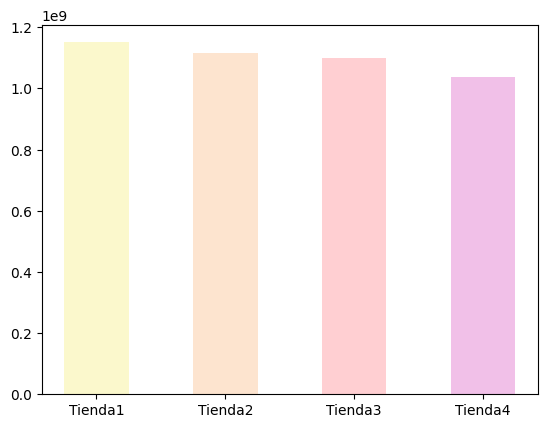

La tienda con mayores ingresos es la Tienda1 con 1150880400.0 ingresos totales.
La tienda con menores ingresos es la Tienda4 con 1038375700.0 ingresos totales.

       Tienda        |     tienda1     |     tienda2     |     tienda3     |     tienda4     |
  Ingresos Totales   |   1150880400.0  |   1116343500.0  |   1098019600.0  |   1038375700.0  | 


In [19]:
graficarIngresosTotales(listaTiendas)

# 2. Ventas por categoría

En este paso calcularemos la cantidad de productos vendidos por categoría en cada tienda. 
La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [20]:
def ventasPorCategoria (tienda, graf = True, res = True):
    '''Función que lee una tienda, y devuelve dos listas, una con los nombres de las categorías y otra con lo valores de venta por categoría

    args:
        lista de tiendas, 
        
        si la variable graf == True, cuyo valor está establecido por defecto, hay salida por gráfico de barras, en caso contrario no.

        si la variable res == True, cuyo valor está por defecto hay salida de conclusiones por print

    outputs:    
        gráfico de barras con ventas por categoría (opcional)
        conclusión a través de print de las 3 categorías más vendidas, y la categoría menos vendida

    return:
        lista[categorias ,valores, [3  más vendidas y la menos vendida][sus valores]]

    '''
    
    # iniciaremos una lista llamada "productosCategorias" para almacenar la categoría de cada producto vendido

    productosCategorias = list(tienda['Categoría del Producto'])
    
    # creamos una lista donde se almacenaran los valores de los nombres de las categorías
    categorias = []

    # creamos una lista llamada 'valores' donde se almacenaran la cantidad de productos vendidos por categoría

    valores = []

    # iteramos sobre la lista total de categorías por producto

    for i in productosCategorias:
        # si la categoría aún no se añadió a nuestra lista de nombre de categorias

        if i not in categorias:

            # agregaremos esa categoría a la lista
            categorias.append(i)

            # definimos la variable valor como contador por cada vez que aparezca la categoría entre los productos
            valor = 0

            # iteramos sobre la lista total de productos para comparar
            for elemento in productosCategorias:
                # si el elemento es igual a la categoría sobre la que se está iterando
                if elemento == i:
                    # sumaremos uno al contador
                    valor += 1
                # agregamos el contador obtenido a la lista valores
            valores.append(valor)

    # para saber los 3 productos más vendidos y el menos vendido
    # creamos una nueva lista para tener los valores ordenados
    valoresOrdenados = list(valores)
    valoresOrdenados.sort()

    # a su vez vamos a modificar los colores de la paleta para resaltar los más y menos vendidos
    colores = list(paleta_de_colores)
    modColores = [ '#f94144','#80b918','#55a630', '#2b9348']

    # listas para almacenar los nombres y valores de las 3 categorías más vendidas y la menos vendida
    MaxMin = [[],[]]

    if res == True:
        # Impresión de valores
        print("\nCategorías más vendidas")
        for i in range(-3,1):
            if i == 0:
                print('\nCategorías menos vendidas:')
            indice = valores.index(valoresOrdenados[i])
            colores[indice]=modColores[i]
            print(f'\t{categorias[indice]}: {valores[indice]}') 
            MaxMin[0].append(categorias[indice])
            MaxMin[1].append(valores[indice])

    # para graficar
    if graf == True:
        plt.title('Ventas por categoría')
        plt.bar(categorias, valores, color= colores)
        
        # damos inclinación a las etiquetas del eje x debido a que son muchas y se superponen
        plt.xticks(rotation=90)

        # mostramos el gráfico
        plt.show()
    
    return [categorias,valores,MaxMin]



Categorías más vendidas
	Juguetes: 324
	Electrónicos: 448
	Muebles: 465

Categorías menos vendidas:
	Artículos para el hogar: 171


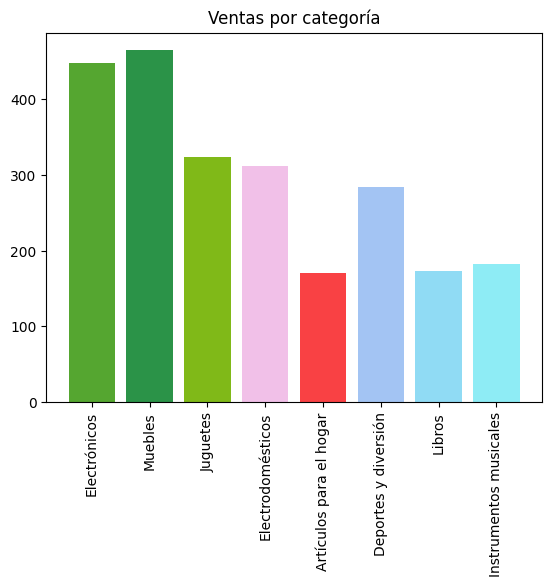

[['Electrónicos',
  'Muebles',
  'Juguetes',
  'Electrodomésticos',
  'Artículos para el hogar',
  'Deportes y diversión',
  'Libros',
  'Instrumentos musicales'],
 [448, 465, 324, 312, 171, 284, 173, 182],
 [['Juguetes', 'Electrónicos', 'Muebles', 'Artículos para el hogar'],
  [324, 448, 465, 171]]]

In [21]:
ventasPorCategoria(tienda1)


Categorías más vendidas
	Juguetes: 313
	Electrónicos: 422
	Muebles: 442

Categorías menos vendidas:
	Artículos para el hogar: 181


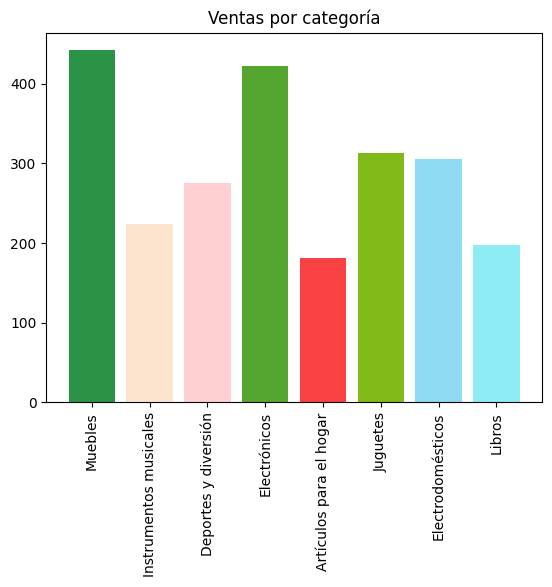

[['Muebles',
  'Instrumentos musicales',
  'Deportes y diversión',
  'Electrónicos',
  'Artículos para el hogar',
  'Juguetes',
  'Electrodomésticos',
  'Libros'],
 [442, 224, 275, 422, 181, 313, 305, 197],
 [['Juguetes', 'Electrónicos', 'Muebles', 'Artículos para el hogar'],
  [313, 422, 442, 181]]]

In [22]:
ventasPorCategoria(tienda2)

In [23]:
ventasPorCategoria(tienda3, 0,0)

[['Electrodomésticos',
  'Muebles',
  'Instrumentos musicales',
  'Deportes y diversión',
  'Electrónicos',
  'Juguetes',
  'Artículos para el hogar',
  'Libros'],
 [278, 499, 177, 277, 451, 315, 177, 185],
 [[], []]]

In [24]:
def grafCircularPorc (tienda):
    nombres = ventasPorCategoria(tienda,False,False)[0]
    valores = ventasPorCategoria(tienda,False,False)[1]
    fig, ax = plt.subplots()
    ax.pie(valores, labels=nombres,autopct='%1.1f%%', colors=paleta_de_colores, pctdistance=.75, labeldistance= 1.1)

    ax.axis('equal')
    plt.title("Venta por categorias\n" )
    plt.show()

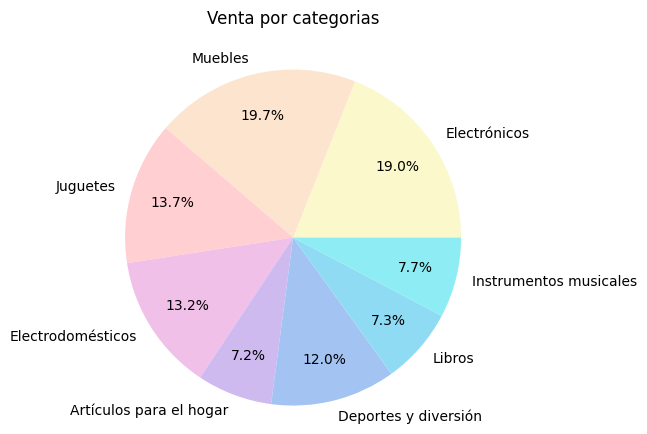

In [25]:
grafCircularPorc(tienda1)

In [26]:
def compararVentasPorCategoria(tiendas):
    categorias = []
    valores = []
    for i in range(len(tiendas)):
        cat, val, inutil = ventasPorCategoria(tiendas[i],0,0)
        combinado_ordenado = sorted(zip(cat,val))
        cat_ord,val_ord = zip(*combinado_ordenado)
        cat_ord = list(cat_ord)
        val_ord = list(val_ord)
        if i == 0:
            categorias = cat_ord
        valores.append(val_ord)

    for i in range(len(tiendas)):
        plt.plot(categorias, valores[i])
    plt.xticks(rotation=90)
    

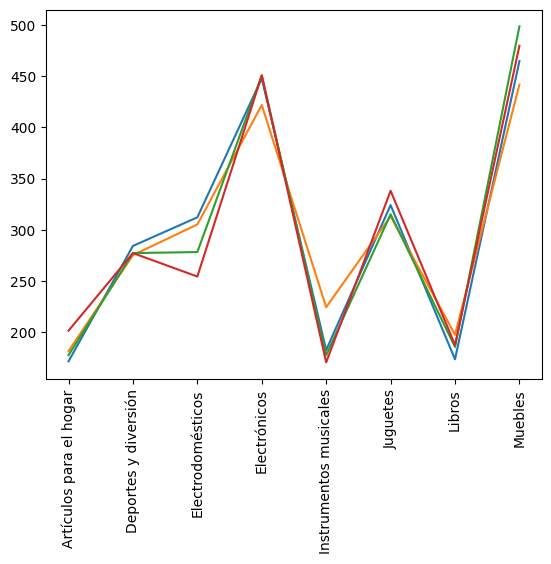

In [27]:
compararVentasPorCategoria(listaTiendas)

# 3. Calificación promedio de la tienda


En este paso, calculamos las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [28]:
def calificacionMedia (tienda):
    ''' Función definida para conocer la satisfacción del cliente con los productos vendidos.
    
    args: 
        tienda: archivo original del que comenzamos a extraer los datos

    return:
        valores de las calificaciones : list
    '''

    # dentro de la tienda, entramos a 'Calificación' con tienda['Calificación'] para guardar todas las calificaciones en una lista
    calificaciones = list(tienda['Calificación'])

    # aplicamos la función sum() para obtener la sumatoria de calificaciones
    # luego con la función len() la aplicamos a la lista de calificaciones para dividir la sumatoria entre la cantidad y obtenemos la media
    media = sum(calificaciones)/len(calificaciones)

    # crearemos otra lista que almacene la cantidad de calificaciones de cada una entre 1 y 5

    valores = [0 for i in range(5)]
    for calif in calificaciones:
        valores[calif-1] +=1

    # devolvemos el valor de la media y lo mostramos por pantalla
    print(f'El promedio de las calificaciones es de {media}')
    return valores


El promedio de las calificaciones es de 3.976685036032217
El promedio de las calificaciones es de 4.037303942348453
El promedio de las calificaciones es de 4.048325561678677
El promedio de las calificaciones es de 3.9957591178965224


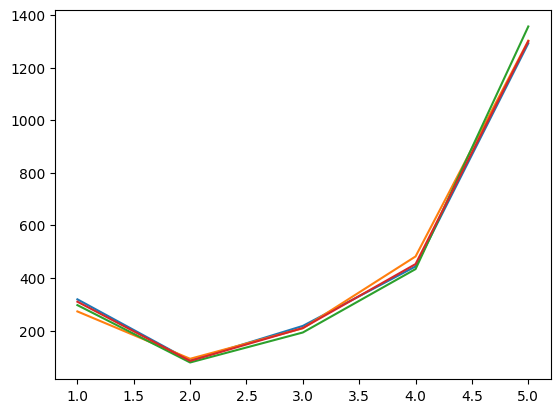

In [29]:
def compararCalificaciones(tiendas):
    for i in range(len(tiendas)):
        plt.plot([x for x in range(1,6)],calificacionMedia(tiendas[i]))

compararCalificaciones(listaTiendas)

# 4. Productos más y menos vendidos

In [30]:
def totalDeProductos(tiendas):
    productos = []
    for tienda in tiendas:
        for producto in tienda['Producto']:
            if producto not in productos:
                productos.append(producto)
    productos.sort()
    

    return productos

listaProd = totalDeProductos([tienda1,tienda2,tienda3,tienda4])

In [31]:
def totalDeProductosPorTienda(tienda, graf = True, res = True):
    valores = [0 for i in range(len(listaProd))]

    for producto in tienda['Producto']:
        valores[listaProd.index(producto)]+=1
    
    minMax = [[min(valores),0,0,0],[listaProd[valores.index(min(valores))],'','','']]

    for p in range(len(valores)):
        if valores[p] >= minMax[0][3]:
            for i in range(1,4):
                if i != 3:
                    minMax[0][i] = minMax[0][i+1]
                    minMax[1][i] = minMax[1][i+1]
                else:
                    minMax[0][i] = valores[p]
                    minMax[1][i] = listaProd[p]
    
    if res == True:
        print(f'El producto más vendido es {minMax[1][3]}\n\tcon {minMax[0][3]} unidades.')
        print(f'El segundo producto más vendido es {minMax[1][2]}\n\tcon {minMax[0][2]} unidades.')
        print(f'El tercer producto más vendido es {minMax[1][1]}\n\tcon {minMax[0][1]} unidades.')
        print(f'El producto menos vendido es {minMax[1][0]}\n\tcon {minMax[0][0]} unidades.')


    if graf == True:
        # a su vez vamos a modificar los colores de la paleta para resaltar los más y menos vendidos
        colores = list(paleta_de_colores*6)
        modColores = [ '#f94144','#80b918','#55a630', '#2b9348']
        for i in range(4):
            colores[listaProd.index(minMax[1][i])]=modColores[i]
        plt.figure(figsize=(15, 5))
        plt.bar(listaProd,valores, color=colores)
        plt.xticks(rotation=90)

    return valores


El producto más vendido es TV LED UHD 4K
	con 60 unidades.
El segundo producto más vendido es Microondas
	con 60 unidades.
El tercer producto más vendido es Armario
	con 60 unidades.
El producto menos vendido es Auriculares con micrófono
	con 33 unidades.


[49,
 60,
 40,
 50,
 33,
 55,
 42,
 53,
 54,
 56,
 44,
 44,
 52,
 33,
 39,
 52,
 44,
 40,
 42,
 40,
 45,
 46,
 47,
 54,
 41,
 49,
 43,
 44,
 47,
 48,
 44,
 40,
 56,
 60,
 39,
 51,
 40,
 35,
 36,
 54,
 58,
 43,
 41,
 46,
 41,
 44,
 43,
 46,
 60,
 42,
 54]

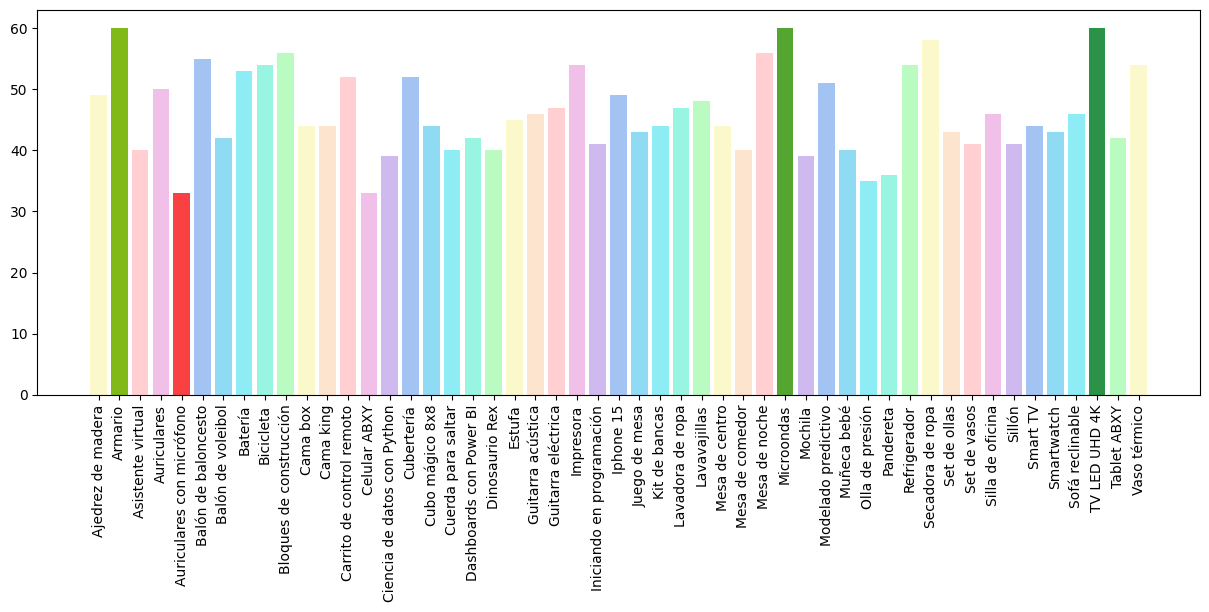

In [32]:
totalDeProductosPorTienda(tienda1)

# 5. Envío promedio por tienda

En este paso, calculamos el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [33]:
def costoEnvioPromedio(tienda):
    envios = list(map(lambda x: x[1], list((tienda['Costo de envío']).items())))

    return sum(envios)/len(envios)

In [34]:
# tabla para ver el promedio del costo de envío por tienda
# imprimimos el encabezado de la tabla
print(f"{'Tienda'.center(25)} | {'Tienda1'.center(10)} | {'Tienda2'.center(10)} | {'Tienda3'.center(10)} | {'Tienda4'.center(10)}")
# imprimimos los valores de los promedios en los costos de envío de cada tienda
print(f"{'Costo Promedio de Envío'.center(25)} | {str(round(costoEnvioPromedio(tienda1),2)).center(10)} | {str(round(costoEnvioPromedio(tienda2),2)).center(10)} | {str(round(costoEnvioPromedio(tienda3),2)).center(10)} | {str(round(costoEnvioPromedio(tienda4),2)).center(10)}")

          Tienda          |  Tienda1   |  Tienda2   |  Tienda3   |  Tienda4  
 Costo Promedio de Envío  |  26018.61  |  25216.24  |  24805.68  |  23459.46 


# Conclusión

In [35]:
paleta_colores_conclusiones = ['#ffbe0b', "#ff006e", '#8338ec', '#3a86ff']

Ingresos totales

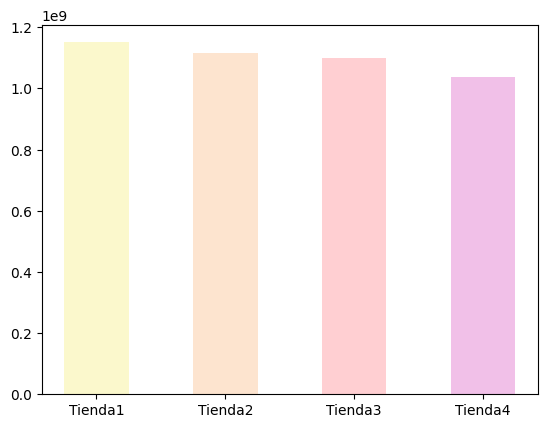

La tienda con mayores ingresos es la Tienda1 con 1150880400.0 ingresos totales.
La tienda con menores ingresos es la Tienda4 con 1038375700.0 ingresos totales.

       Tienda        |     tienda1     |     tienda2     |     tienda3     |     tienda4     |
  Ingresos Totales   |   1150880400.0  |   1116343500.0  |   1098019600.0  |   1038375700.0  | 


In [36]:
graficarIngresosTotales(listaTiendas)

Conclusión 1: los ingresos totales son menores en la tienda 4.

Ventas por Categoría

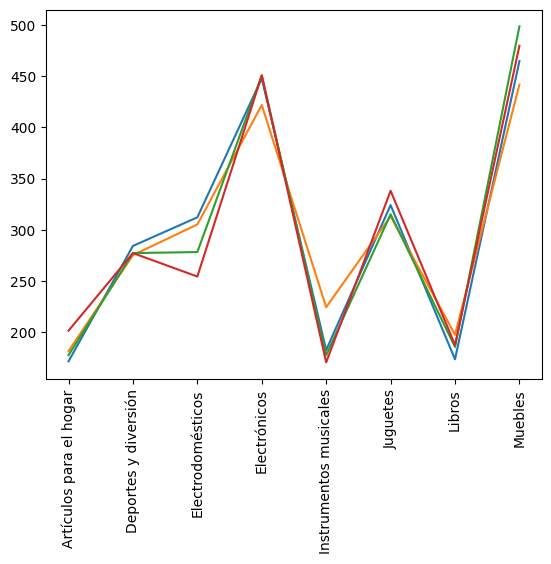

In [37]:
compararVentasPorCategoria(listaTiendas)

En base a la venta por categorías, todas las tiendas se encuentran en condiciones similares

En base a las calificaciones de las tiendas

El promedio de las calificaciones es de 3.976685036032217
El promedio de las calificaciones es de 4.037303942348453
El promedio de las calificaciones es de 4.048325561678677
El promedio de las calificaciones es de 3.9957591178965224


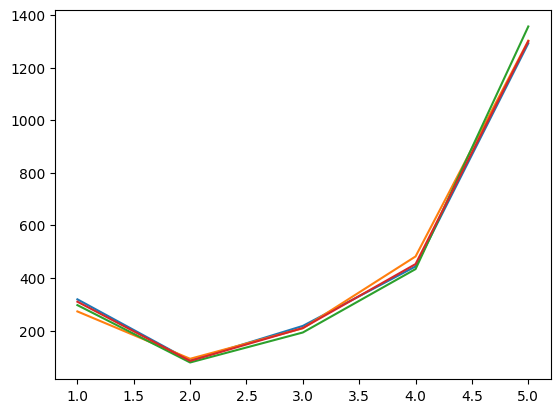

In [38]:
compararCalificaciones(listaTiendas)

En sí son muy similares las calificaciones, pero podemos concluir en que la tienda 3 es la de mejor calificación, y la tienda 1 es la de menor calificacion.

En cuanto a la venta de productos por tienda

In [39]:
plt.figure(figsize=(150,50))
for i in range(4):
    print(f"")
    plt.bar(listaProd,totalDeProductosPorTienda(listaTiendas[i],False,0))
plt.xticks(rotation=90, fontsize=75)
plt.legend(['Tienda1','Tienda2','Tienda3','Tienda4'],prop={'size': 75})
plt.show()

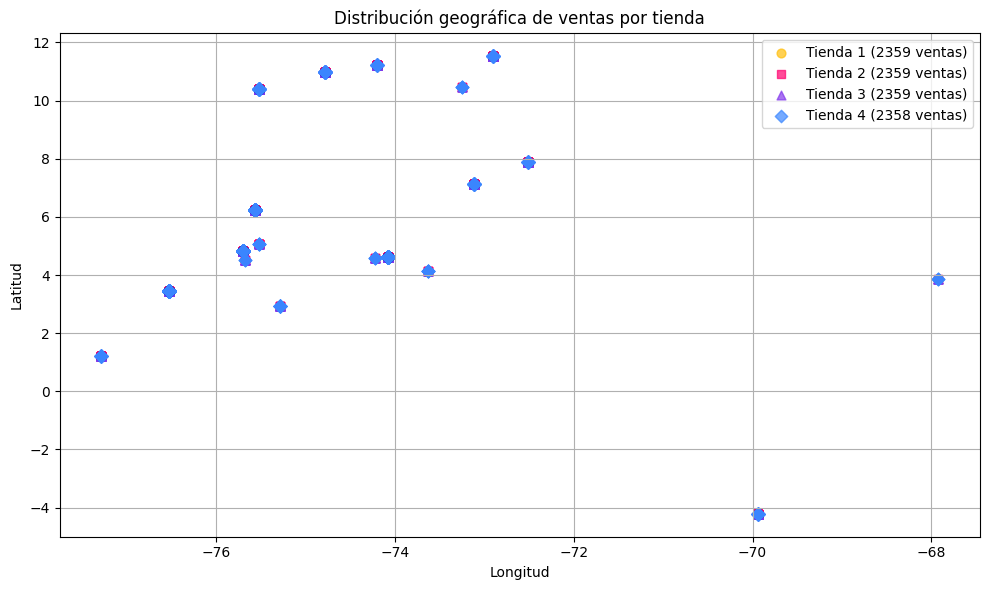

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Lista de formas para los marcadores (uno por tienda)
formas = ['o', 's', '^', 'D']  # círculo, cuadrado, triángulo, rombo

for i, tienda in enumerate(listaTiendas):
    latitudes = tienda['lat'].values
    longitudes = tienda['lon'].values
    color = paleta_colores_conclusiones[i] if i < len(paleta_colores_conclusiones) else None
    forma = formas[i % len(formas)]  # En caso de más de 4 tiendas

    ax.scatter(
        longitudes,
        latitudes,
        s=40,
        alpha=0.7,
        label=f'Tienda {i+1} ({len(latitudes)} ventas)',
        color=color,
        marker=forma
    )

# Ejes y formato
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Distribución geográfica de ventas por tienda')
ax.legend(loc='best')
ax.grid(True)
plt.tight_layout()
plt.show()


No se interpreta correctamente ya que se superponen los puntos.

In [41]:
!pip install folium



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import folium
from folium.plugins import MarkerCluster
import numpy as np

# Crear mapa centrado en Colombia
mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Colores para cada tienda
colores_tiendas = ['red', 'blue', 'green', 'purple']

# Recorremos las tiendas
for i, tienda in enumerate(listaTiendas):
    latitudes = tienda['lat'].values
    longitudes = tienda['lon'].values
    color = colores_tiendas[i % len(colores_tiendas)]

    # Crear un grupo de marcadores para cada tienda
    cluster = MarkerCluster(name=f'Tienda {i+1}').add_to(mapa)

    for lat, lon in zip(latitudes, longitudes):
        folium.CircleMarker(
            location=[lat, lon],
            radius=3,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6
        ).add_to(cluster)

# Añadir control de capas
folium.LayerControl().add_to(mapa)

# Mostrar mapa en Jupyter Notebook (o guardar como HTML si usás VSCode)
mapa
